# Computer Assignment 4

Danial Saeedi(810198571)

# Importing Dependencies

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('dataset.csv');
df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.1590,-7.429,Major,0.0382,142.065,0.6070,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.1270,-10.147,Major,0.1840,79.969,0.2870,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.2650,-7.080,Minor,0.0378,NaN,0.6360,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.1390,-15.542,Major,0.0346,82.707,0.2060,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.3060,-6.625,Major,0.0630,104.694,0.3830,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",22.0,0.91100,0.326,368640.0,0.1330,0.000000,G,0.1300,-20.493,Major,0.0557,92.090,0.2060,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",26.0,0.96500,0.126,514213.0,0.2040,0.869000,B,0.1060,-16.474,Major,0.0395,82.437,0.0387,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",54.0,0.97600,0.363,262147.0,0.1150,0.000000,D,0.0992,-17.325,Major,0.0689,NaN,0.2310,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",42.0,0.98500,0.123,259573.0,0.0174,0.906000,E,0.1250,-23.671,Major,0.0408,71.705,0.0352,Classical


# Exploratory Data Analysis & Visualization

## Part 1

Pandas **describe** is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [3]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


Pandas **info()** function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

There are 30000 records in this dataset. The average popularity of all songs is 47%. The average duration of songs is approximately 246 seconds. Also based on info function, there are some null values in artist_name, duration_ms, and tempo.

## Part 2
In this part the combination of two Pandas methods (isnull and sum) is used in oreder to count number of missing values at each column.



In [5]:
# Got this code from a stackoverflow question
def printMissingPercentage(data):
    missing_values = data.isnull().sum() * 100 / len(data)
    missing_values = pd.DataFrame({'Property': data.columns,
                                 'NA values percentage': missing_values})
    missing_values.sort_values('NA values percentage', inplace=True, ascending=False)
    missing_values.reset_index(inplace=True, drop=True)
    print(missing_values)

In [6]:
printMissingPercentage(df)

            Property  NA values percentage
0        duration_ms             10.033333
1              tempo              9.776667
2        artist_name              4.980000
3         track_name              0.000000
4         popularity              0.000000
5       acousticness              0.000000
6       danceability              0.000000
7             energy              0.000000
8   instrumentalness              0.000000
9                key              0.000000
10          liveness              0.000000
11          loudness              0.000000
12              mode              0.000000
13       speechiness              0.000000
14           valence              0.000000
15       music_genre              0.000000


## Part 3

According to the distribution plot of numerical feature, the distribution is **normal**.

### Tempo

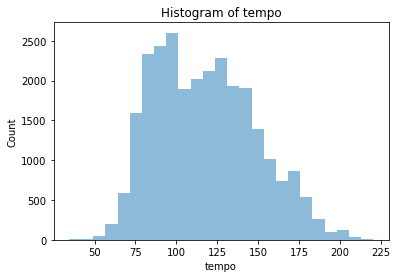

In [7]:
plt.hist(df.tempo, 
         range=(df.tempo.min(),
                df.tempo.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("tempo") 
plt.ylabel("Count") 
plt.title("Histogram of tempo") 
plt.show()

### Popularity

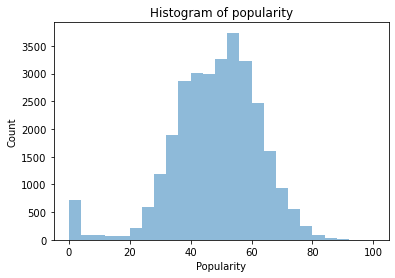

In [8]:
plt.hist(df.popularity, 
         range=(df.popularity.min(),
                df.popularity.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("Popularity") 
plt.ylabel("Count") 
plt.title("Histogram of popularity") 
plt.show()

### Acousticness

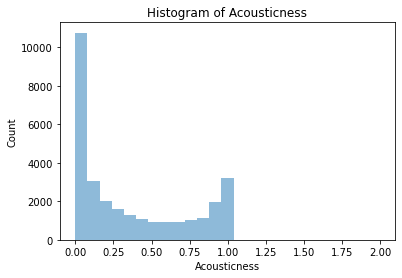

In [9]:
plt.hist(df.acousticness, 
         range=(df.acousticness.min(),
                df.acousticness.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("Acousticness") 
plt.ylabel("Count") 
plt.title("Histogram of Acousticness") 
plt.show()

### Danceability

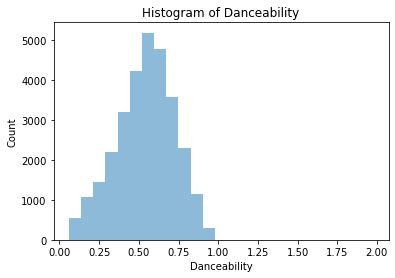

In [10]:
plt.hist(df.danceability, 
         range=(df.danceability.min(),
                df.danceability.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("Danceability") 
plt.ylabel("Count") 
plt.title("Histogram of Danceability") 
plt.show()

### Duration(ms)

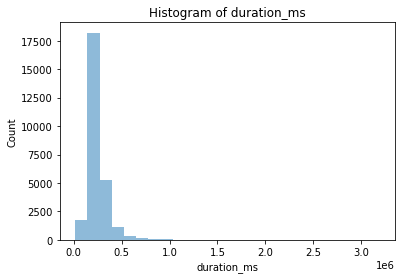

In [11]:
plt.hist(df.duration_ms, 
         range=(df.duration_ms.min(),
                df.duration_ms.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("duration_ms") 
plt.ylabel("Count") 
plt.title("Histogram of duration_ms") 
plt.show()

### Energy

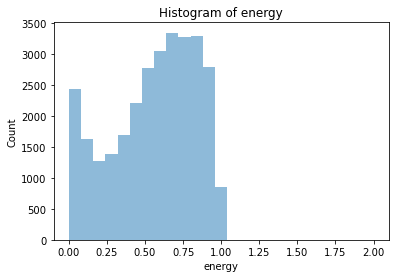

In [12]:
plt.hist(df.energy, 
         range=(df.energy.min(),
                df.energy.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("energy") 
plt.ylabel("Count") 
plt.title("Histogram of energy") 
plt.show()

### instrumentalness

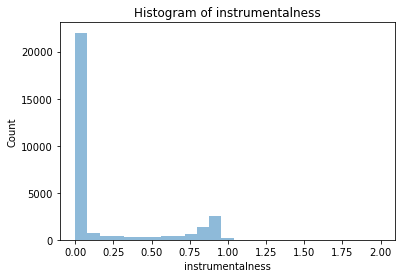

In [13]:
plt.hist(df.instrumentalness, 
         range=(df.instrumentalness.min(),
                df.instrumentalness.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("instrumentalness") 
plt.ylabel("Count") 
plt.title("Histogram of instrumentalness") 
plt.show()

### liveness

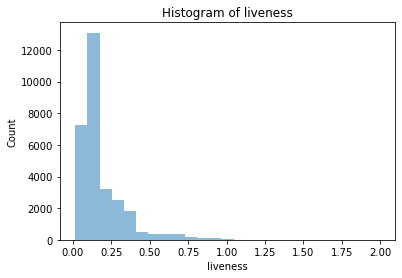

In [14]:
plt.hist(df.liveness, 
         range=(df.liveness.min(),
                df.liveness.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("liveness") 
plt.ylabel("Count") 
plt.title("Histogram of liveness") 
plt.show()

### loudness

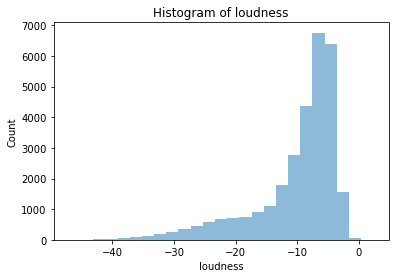

In [15]:
plt.hist(df.loudness, 
         range=(df.loudness.min(),
                df.loudness.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("loudness") 
plt.ylabel("Count") 
plt.title("Histogram of loudness") 
plt.show()

### valence

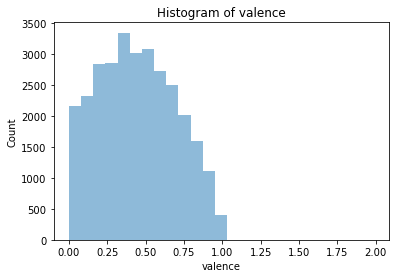

In [16]:
plt.hist(df.valence, 
         range=(df.valence.min(),
                df.valence.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel("valence") 
plt.ylabel("Count") 
plt.title("Histogram of valence") 
plt.show()

### Key

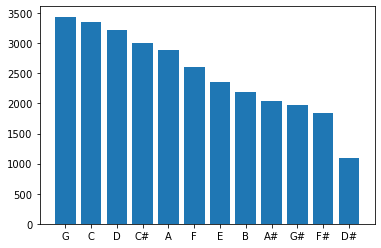

In [17]:
counts = df['key'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

### Mode

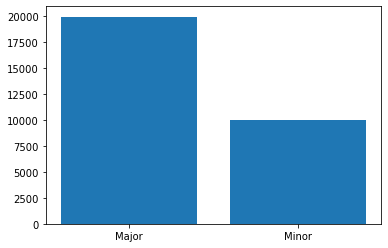

In [18]:
counts = df['mode'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

### Music Genre

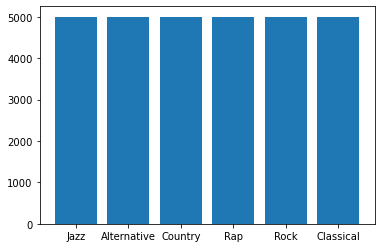

In [19]:
counts = df['music_genre'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

# Preprocessing

## Part 1
There are multiple ways to deal with missing values. Here,  we'll discuss some common methods:

1. **Deleting Rows or Cols with missing values:** Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

    **Pros :** 
- A model trained with the removal of all missing values creates a robust model.

    **Cons :**
- Loss of a lot of information.
- Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.

2. **Impute missing values with Mean/Median:** Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values.

    **Pros :** 
- Prevent data loss which results in deletion of rows or columns
- Works well with a small dataset and is easy to implement.

    **Cons :**
- Works only with numerical continuous variables.
- Can cause data leakage
- Do not factor the covariance between features.

3. **Imputation method for categorical columns:** When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category.

    **Pros :** 
- Prevent data loss which results in deletion of rows or columns
- Works well with a small dataset and is easy to implement.
- Negates the loss of data by adding a unique category

    **Cons :**
- Works only with categorical variables.
- Addition of new features to the model while encoding, which may result in poor performance

## Part 2

In this project, we're going to fill numerical cols with the **average** of its column and for non-numerical cols with the **mode** of its column. 

In [20]:
df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].mean())

In [21]:
df['tempo'] = df['tempo'].fillna(df['tempo'].mean())

In [22]:
df['artist_name'] = df['artist_name'].fillna(df['artist_name'].mode()[0])

In [23]:
printMissingPercentage(df)

            Property  NA values percentage
0        artist_name                   0.0
1         track_name                   0.0
2         popularity                   0.0
3       acousticness                   0.0
4       danceability                   0.0
5        duration_ms                   0.0
6             energy                   0.0
7   instrumentalness                   0.0
8                key                   0.0
9           liveness                   0.0
10          loudness                   0.0
11              mode                   0.0
12       speechiness                   0.0
13             tempo                   0.0
14           valence                   0.0
15       music_genre                   0.0


## Part 3: Why normalization?

- It is used to remove the duplicate data and database anomalies from the relational table.
- Normalization helps to reduce redundancy and complexity by examining new data types used in the table.
- It is helpful to divide the large database table into smaller tables and link them using relationship.
- It avoids duplicate data or no repeating groups into a table.
- It reduces the chances for anomalies to occur in a database.

**Normalizing** a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

**Standardizing** a vector most often means subtracting a measure of location and dividing by a measure of scale. For example, if the vector contains random values with a Gaussian distribution, you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1.

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

For example, consider a data set containing two features, age, and income(x2). Where age ranges from 0–100, while income ranges from 0–100,000 and higher. Income is about 1,000 times larger than age. So, these two features are in very different ranges. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So we normalize the data to bring all the variables to the same range.

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

## Part 4
In our dataset we have the problems mentioned above and so we do standardizing using (or Z-score normalization), which means centering the variable at zero and standardizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation: The result of standardization is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

$μ=0 , σ=1$

In [24]:
standardizing_columns = ['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
for col in standardizing_columns:
    df[col] = (df[col]-df[col].mean())/df[col].std()

## Part 5

1. **One Hot Encoding**: In this method, we map each category to a vector that contains 1 and 0 denoting the presence of the feature or not. The number of vectors depends on the categories which we want to keep. For high cardinality features, this method produces a lot of columns that slows down the learning significantly. There is a buzz between one hot encoding and dummy encoding and when to use one. They are much alike except one hot encoding produces the number of columns equal to the number of categories and dummy producing is one less. This should ultimately be handled by the modeler accordingly in the validation process.

2. **Label Encoding**: In this encoding each category is assigned a value from 1 through N (here N is the number of category for the feature). It may look like (Car<Bus<Truck ….0 < 1 < 2). Categories that have some ties or are close to each other lose some information after encoding.

In [25]:
df['music_genre'].unique()

array(['Jazz', 'Alternative', 'Country', 'Rap', 'Rock', 'Classical'],
      dtype=object)

In this project we're going to use one-hot encoding because one hot encoding makes our training data more useful and expressive, and it can be rescaled easily. By using numeric values, we more easily determine a probability for our values. In particular, one hot encoding is used for our output values, since it provides more nuanced predictions than single labels.

In [26]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['music_genre_categorical'] = le.fit_transform(df['music_genre'])

# df = pd.get_dummies(df,prefix=['music_genre'], columns = ['music_genre'], drop_first=True)

In [27]:
df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,music_genre_categorical
0,Blockhead,"Cheer up, You're Not Dead Yet",-0.259741,-0.970532,0.935904,3.683534e-01,0.231381,-0.458783,G,-0.163272,0.381203,Major,-0.489052,8.398059e-01,0.644987,Jazz,3
1,FloFilz,Corners,-0.948794,-0.034765,1.034959,-1.338391e+00,-0.150111,-0.527946,C,-0.375567,-0.009655,Major,1.072549,-1.288258e+00,-0.641471,Jazz,3
2,Bonobo,We Could Forever,0.222596,-0.937884,0.704778,1.201735e-13,1.181513,2.122853,G,0.539958,0.431391,Minor,-0.493336,-2.751628e-13,0.761572,Jazz,3
3,Nils Landgren,A Child Is Born,-0.604268,1.533131,-0.313279,-1.677218e-01,-1.754179,-0.548746,F,-0.295956,-0.785474,Major,-0.527610,-1.194425e+00,-0.967105,Jazz,3
4,Masayoshi Takanaka,Samba Pati,-0.810984,-0.892852,-0.373812,9.009268e-01,0.958376,0.805165,G,0.811962,0.496821,Major,-0.223430,-4.409188e-01,-0.255534,Jazz,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",-1.775658,1.513910,-1.182754,1.142242e+00,-1.524924,-0.548956,G,-0.355665,-1.497445,Major,-0.301617,-8.728649e-01,-0.967105,Classical,1
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",-1.500037,1.662188,-2.283356,2.505257e+00,-1.269396,2.089455,B,-0.514887,-0.919499,Major,-0.475128,-1.203678e+00,-1.639681,Classical,1
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",0.429312,1.692392,-0.979143,1.451370e-01,-1.589705,-0.548956,D,-0.559999,-1.041876,Major,-0.160237,-2.751628e-13,-0.866601,Classical,1
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",-0.397552,1.717105,-2.299865,1.210364e-01,-1.940966,2.201793,E,-0.388836,-1.954453,Major,-0.461204,-1.571470e+00,-1.653752,Classical,1


## Part 6

Since each artist usually performs in one category, `artist_name` is useful feature to predict music genre. We could use LabelEncoder from Sklearn. This method encodes target labels with value between `0` and `n_classes-1`.


In [28]:
le = preprocessing.LabelEncoder()

df['artist_name'] = le.fit_transform(df['artist_name'])
df['mode'] = le.fit_transform(df['mode'])
df['key'] = le.fit_transform(df['key'])
df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,music_genre_categorical
0,531,"Cheer up, You're Not Dead Yet",-0.259741,-0.970532,0.935904,3.683534e-01,0.231381,-0.458783,10,-0.163272,0.381203,0,-0.489052,8.398059e-01,0.644987,Jazz,3
1,1511,Corners,-0.948794,-0.034765,1.034959,-1.338391e+00,-0.150111,-0.527946,3,-0.375567,-0.009655,0,1.072549,-1.288258e+00,-0.641471,Jazz,3
2,582,We Could Forever,0.222596,-0.937884,0.704778,1.201735e-13,1.181513,2.122853,10,0.539958,0.431391,1,-0.493336,-2.751628e-13,0.761572,Jazz,3
3,3210,A Child Is Born,-0.604268,1.533131,-0.313279,-1.677218e-01,-1.754179,-0.548746,8,-0.295956,-0.785474,0,-0.527610,-1.194425e+00,-0.967105,Jazz,3
4,2874,Samba Pati,-0.810984,-0.892852,-0.373812,9.009268e-01,0.958376,0.805165,10,0.811962,0.496821,0,-0.223430,-4.409188e-01,-0.255534,Jazz,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4924,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",-1.775658,1.513910,-1.182754,1.142242e+00,-1.524924,-0.548956,10,-0.355665,-1.497445,0,-0.301617,-8.728649e-01,-0.967105,Classical,1
29996,3176,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",-1.500037,1.662188,-2.283356,2.505257e+00,-1.269396,2.089455,2,-0.514887,-0.919499,0,-0.475128,-1.203678e+00,-1.639681,Classical,1
29997,1662,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",0.429312,1.692392,-0.979143,1.451370e-01,-1.589705,-0.548956,5,-0.559999,-1.041876,0,-0.160237,-2.751628e-13,-0.866601,Classical,1
29998,1330,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",-0.397552,1.717105,-2.299865,1.210364e-01,-1.940966,2.201793,7,-0.388836,-1.954453,0,-0.461204,-1.571470e+00,-1.653752,Classical,1


## Part 7

Now we drop the categorical columns which we don't want to include in our `mutual info` calculation.

In [29]:
y = df['music_genre_categorical']
X = df.drop(columns=['track_name', 'music_genre','music_genre_categorical'], axis = 1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending = False, inplace = True)

mi

artist_name         1.139648
popularity          0.516889
acousticness        0.357001
loudness            0.344614
energy              0.331171
instrumentalness    0.295354
danceability        0.282824
speechiness         0.207174
valence             0.142749
duration_ms         0.102183
tempo               0.093486
mode                0.023612
liveness            0.014870
key                 0.012991
dtype: float64

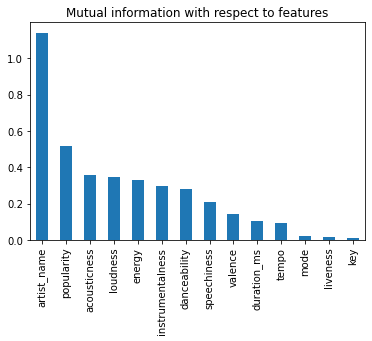

In [31]:
import matplotlib.pyplot as plt

plt.title('Mutual information with respect to features')
mi.plot.bar()
plt.show()

## Part 9

This plot shows that only the columns artist_name, popularity, acousticness, instrumentalness, and dancebility are giving us useful info about the music genre of each row. We can simply eliminate the other columns since they don't have much gain.


# Phase 2: Model Training, Evaluation and Hyper Parameter Tuning

## Part 1

In statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data).

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

Common splits:
- 80:20
- 67:33
- 50:50

In this project, we used 80:20 split.

**Why shuffling the dataset is important?** 

It helps the training converge fast. it prevents any bias during the training. it prevents the model from learning the order of the training.

**Should each music genre be balanced?**

If the dataset is imbalanced, the model could be biased against some classes. So we have to use techniques like under-sampling, over-sampling, data augmentation, and etc to increase accuracy of the model.

**Whta is Stratify?**

Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [32]:
X = df[['artist_name','popularity','acousticness','instrumentalness','danceability']].values
y = df['music_genre_categorical'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

len(X_train)

24000

In [33]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X_train)

A = neigh.kneighbors_graph(X_train)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [34]:
from sklearn.metrics import accuracy_score
def knn_algorithm(n_neigh): 
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    neigh.fit(X_train, y_train)
    return neigh

In [38]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_train = []
accuracy_test = []
for i in range(1,101):
    neigh = knn_algorithm(i)
    y_pred_test = neigh.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred_test))

    y_pred_train = neigh.predict(X_train)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    

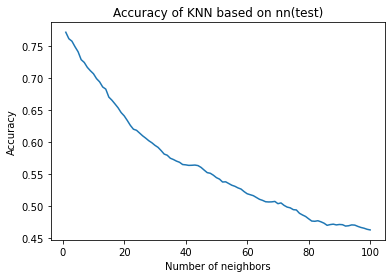

In [39]:
plt.plot(range(1,101), accuracy_test)
# naming the x axis
plt.xlabel('Number of neighbors')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to my graph
plt.title('Accuracy of KNN based on nn(test)')
  
# function to show the plot
plt.show();

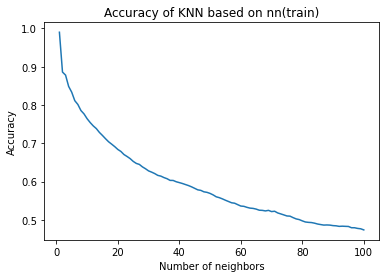

In [40]:
plt.plot(range(1,101), accuracy_train)
# naming the x axis
plt.xlabel('Number of neighbors')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to my graph
plt.title('Accuracy of KNN based on nn(train)')
  
# function to show the plot
plt.show();

## Part 4

The optimal hyperparamters are:

- max_depth = 10
- min_samples_split = 2

In [70]:
from sklearn.tree import DecisionTreeClassifier

accuracy_dtc_test = []
accuracy_dtc_train = []
for i in range(1,101):
    clf = DecisionTreeClassifier(max_depth=i,min_samples_split = 2, random_state=0)
    clf.fit(X_train, y_train)

    accuracy_dtc_test.append(accuracy_score(y_test,clf.predict(X_test)))
    accuracy_dtc_train.append(accuracy_score(y_train,clf.predict(X_train)))

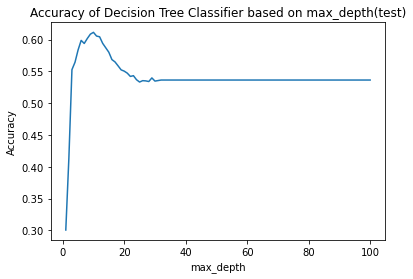

In [71]:
plt.plot(range(1,101), accuracy_dtc_test)
# naming the x axis
plt.xlabel('max_depth')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to my graph
plt.title('Accuracy of Decision Tree Classifier based on max_depth(test)')
plt.show()

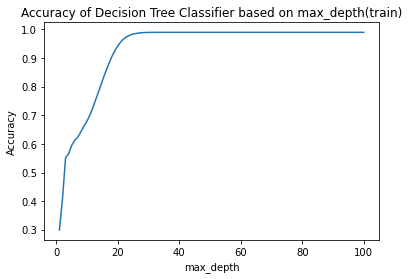

In [72]:
plt.plot(range(1,101), accuracy_dtc_train)
# naming the x axis
plt.xlabel('max_depth')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to my graph
plt.title('Accuracy of Decision Tree Classifier based on max_depth(train)')
plt.show()

## Part 5

**Overfitting** means that the model performs very well on training data, but fails as soon it sees some new data from the problem domain. **Underfitting**, on the other hand, means, that the model performs poorly on both datasets.

- A too shallow decision tree --> underfitting

- A too deep decision tree --> overfitting

If we choose a very small max_depth, underfitting would occur and if we choose too large max_depth, then overfitting occurs. According to part 4, the optimal hyper-paramters are:

- max_depth = 10
- min_samples_split = 2

## Part 6

- **F1-score:** The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers. 
- **Accuracy:** Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.
- **Precision:** Precision refers to the number of true positives divided by the total number of positive predictions.
- **Recall:** Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

### Decision Tree

In [73]:
clf = DecisionTreeClassifier(max_depth=10,min_samples_split = 2, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [89]:
print('Accuracy(test): ',accuracy_score(y_test,clf.predict(X_test)))
print('Accuracy(train): ',accuracy_score(y_train,clf.predict(X_train)))
print('----------------------------------------')
print('F1-Score(test): ',f1_score(y_test, clf.predict(X_test), average='weighted'))
print('F1-Score(train): ',f1_score(y_train, clf.predict(X_train), average='weighted'))
print('----------------------------------------')
print('Precision(test): ',precision_score(y_test, clf.predict(X_test), average='weighted'))
print('Precision(train): ',precision_score(y_train, clf.predict(X_train), average='weighted'))
print('----------------------------------------')
print('Recall(test): ',recall_score(y_test, clf.predict(X_test), average='weighted'))
print('Recall(train): ',recall_score(y_train, clf.predict(X_train), average='weighted'))

Accuracy(test):  0.6115
Accuracy(train):  0.6804583333333334
----------------------------------------
F1-Score(test):  0.6102155050886471
F1-Score(train):  0.680181735538775
----------------------------------------
Precision(test):  0.6182567963594029
Precision(train):  0.6910293318610878
----------------------------------------
Recall(test):  0.6115
Recall(train):  0.6804583333333334


### KNN

In [92]:
clf = knn_algorithm(5)

print('Accuracy(test): ',accuracy_score(y_test,clf.predict(X_test)))
print('Accuracy(train): ',accuracy_score(y_train,clf.predict(X_train)))
print('----------------------------------------')
print('F1-Score(test): ',f1_score(y_test, clf.predict(X_test), average='weighted'))
print('F1-Score(train): ',f1_score(y_train, clf.predict(X_train), average='weighted'))
print('----------------------------------------')
print('Precision(test): ',precision_score(y_test, clf.predict(X_test), average='weighted'))
print('Precision(train): ',precision_score(y_train, clf.predict(X_train), average='weighted'))
print('----------------------------------------')
print('Recall(test): ',recall_score(y_test, clf.predict(X_test), average='weighted'))
print('Recall(train): ',recall_score(y_train, clf.predict(X_train), average='weighted'))

Accuracy(test):  0.7416666666666667
Accuracy(train):  0.833375
----------------------------------------
F1-Score(test):  0.7402915646010506
F1-Score(train):  0.8328519354405345
----------------------------------------
Precision(test):  0.7445400588425823
Precision(train):  0.8367804868250094
----------------------------------------
Recall(test):  0.7416666666666667
Recall(train):  0.833375


## Part 7

Choosing the correct hyper-parameters and pre-processing the data had a huge impact on the accuracy of the model. We've also removed some insignificant features to boost the accuracy. By using normalization, we avoid raw data and various problems of datasets by creating new values and maintaining general distribution as well as a ratio in data. 


# Phase 3: Ensemble Methods

Taken from Sklearn documentation:

- **min_samples_leaf:** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

- **n_estimators:** The number of trees in the forest.

- **max_depth:** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.



In [130]:
clf = RandomForestClassifier(max_depth=20, n_estimators = 100,min_samples_leaf = 2,random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=500,
                       random_state=42)

In [140]:
print('Accuracy(test): ',accuracy_score(y_test,clf.predict(X_test)))
print('Accuracy(train): ',accuracy_score(y_train,clf.predict(X_train)))
print('----------------------------------------')
print('F1-Score(test): ',f1_score(y_test, clf.predict(X_test), average='weighted'))
print('F1-Score(train): ',f1_score(y_train, clf.predict(X_train), average='weighted'))
print('----------------------------------------')
print('Precision(test): ',precision_score(y_test, clf.predict(X_test), average='weighted'))
print('Precision(train): ',precision_score(y_train, clf.predict(X_train), average='weighted'))
print('----------------------------------------')
print('Recall(test): ',recall_score(y_test, clf.predict(X_test), average='weighted'))
print('Recall(train): ',recall_score(y_train, clf.predict(X_train), average='weighted'))

Accuracy(test):  0.712333333333
Accuracy(train):  0.9395
----------------------------------------
F1-Score(test):  0.712569861345
F1-Score(train):  0.9396800598370981
----------------------------------------
Precision(test):  0.73823480872
Precision(train):  0.9409847937337298
----------------------------------------
Recall(test):  0.70169364802118
Recall(train):  0.9395


In [136]:
confusion_matrix(y_train, clf.predict(X_train))

array([[429,   9, 162,  88,  98, 214],
       [ 27, 888,  11,  67,   1,   6],
       [128,   7, 551,  98,  79, 137],
       [ 71,  89, 121, 652,  21,  46],
       [ 47,   0,  49,  12, 683, 209],
       [104,   7,  74,  20, 180, 615]])